In [1]:
%matplotlib inline
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
# veri okuma (reading data)

data = pd.read_csv("headbrain.csv")
data.head(10)

,Gender,Age Range,Head Size(cm^3),Brain Weight(grams)
0,1,1,4512,1530
1,1,1,3738,1297
2,1,1,4261,1335
3,1,1,3777,1282
4,1,1,4177,1590
5,1,1,3585,1300
6,1,1,3785,1400
7,1,1,3559,1255
8,1,1,3613,1355
9,1,1,3982,1375


In [3]:
data.describe() # Betimsel istatistikler


,Gender,Age Range,Head Size(cm^3),Brain Weight(grams)
count,237.000000,237.000000,237.000000,237.000000
mean,1.434599,1.535865,3633.991561,1282.873418
std,0.496753,0.499768,365.261422,120.340446
min,1.000000,1.000000,2720.000000,955.000000
25%,1.000000,1.000000,3389.000000,1207.000000
50%,1.000000,2.000000,3614.000000,1280.000000
75%,2.000000,2.000000,3876.000000,1350.000000
max,2.000000,2.000000,4747.000000,1635.000000


In [4]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 237 entries, 0 to 236
Data columns (total 4 columns):
 #   Column               Non-Null Count  Dtype
---  ------               --------------  -----
 0   Gender               237 non-null    int64
 1   Age Range            237 non-null    int64
 2   Head Size(cm^3)      237 non-null    int64
 3   Brain Weight(grams)  237 non-null    int64
dtypes: int64(4)
memory usage: 7.5 KB


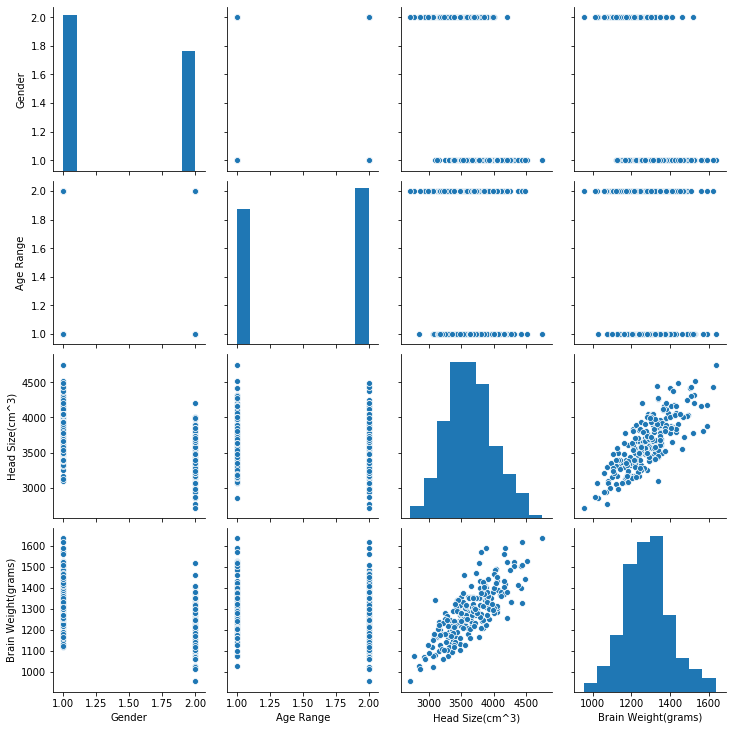

In [5]:
sns.pairplot(data)

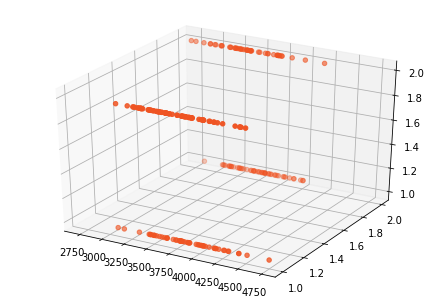

In [6]:
from mpl_toolkits.mplot3d import Axes3D
fig = plt.figure()
ax = Axes3D(fig)
ax.scatter(data["Head Size(cm^3)"].values, data["Gender"].values,data["Age Range"].values, color='#ef5423')
plt.show()


In [7]:
# X ve Y'ye uygun özellik atama: (Assign appropriate feature to X and Y)

X = data["Head Size(cm^3)"]
Y = data["Brain Weight(grams)"]


In [8]:
# basit regresyon doğrusu için b0 ve b1 katsayılarını hesaplayalım: (Let's calculate the coefficients b0 and b1:)

# X ve Y için ortalama hesaplama: (Mean X and Y)

mean_X = np.mean(X)
mean_Y = np.mean(Y)

print("mean_X: ",round(mean_X,5))
print("mean_Y: ",round(mean_Y,5))

mean_X:  3633.99156
mean_Y:  1282.87342


In [9]:
# Toplam gözlem sayısı (total number of observations )

n = len(X)
print("Toplam gözlem sayısı:",n)

Toplam gözlem sayısı: 237


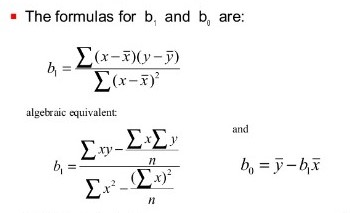

In [10]:
# Y = b0 + b1*X 
# Öncelikle basit regresyon doğrusu için b1 sonra b0 katsayılarını bulacağız: (First we will find the coefficients b1 then b0 for the simple regression line.)

numerator = 0
denominator = 0
for i in range(n):
    numerator += (X[i] - mean_X) * (Y[i] - mean_Y)
    denominator += (X[i] - mean_X) **2

b1 = numerator / denominator
b0 = mean_Y - (b1 * mean_X)
# katsayıları yazdıralım:  ( print the coefficients )

print("b0 :", round(b0,5))
print("b1:",round(b1,5))

b0 : 325.57342
b1: 0.26343


In [11]:
# Değerleri ve Regresyon Çizgisini Çizme : (Plotting Values and Regression Line)

x = np.linspace(np.mean(X) - 3*np.std(X) , np.mean(X) + 3*np.std(X) , n)
y = b0 + b1 * x # hypotesis function

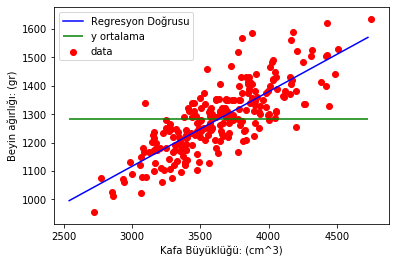

In [12]:
# Ploting Line

plt.plot(x, y, color='blue', label='Regresyon Doğrusu')
plt.hlines(mean_Y,np.mean(X) - 3*np.std(X), np.mean(X) + 3*np.std(X), color="green", label="y ortalama")

# Saçılım Grafiği (Scatter Plot)
plt.scatter(X, Y, c='red', label='data')
plt.xlabel('Kafa Büyüklüğü: (cm^3)')
plt.ylabel('Beyin ağırlığı: (gr)')
plt.legend()


plt.show()


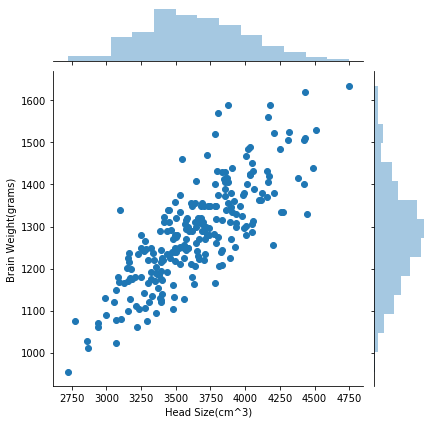

In [13]:
sns.jointplot(data['Head Size(cm^3)' ],data['Brain Weight(grams)'])

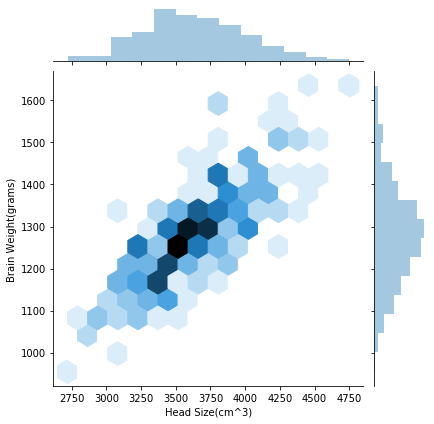

In [14]:
sns.jointplot(data['Head Size(cm^3)' ],data['Brain Weight(grams)'],kind='hex')

In [15]:
#  Kök Ortalama Kare Hatası Hesabı: (Calculating Root Mean Squares Error)

MSE = 0

for j in range(n):
    y_pred = b0 + b1 * X[i]
    MSE += (Y[i] - y_pred) ** 2
    
RMSE = np.sqrt(MSE / n)

print("Root Mean Squared Error :", round(RMSE,5))

Root Mean Squared Error : 98.86231


In [16]:
# R^2 Determinasyon Katsayısı Hesabı: (Calculating R2 Score)
# Determinasyon kat sayısı R2 ile gösterilir. Korelasyon katsayısının karesi determinasyon kat sayısını verir.

# sst = ssr + sse ( sst; regresyon modeli tarafindan aciklanan ve aciklanamayan degisimin toplami anlamina gelir.)
# R^2 = 1 - (SSR / SST)

# SSR : Regresyon İle Açıklanabilen varyasyon ( gerçek y değeri - tahmini y değeri) ** 2
# SST (sum of squares total)  : Toplam varyasyon (gerçek y değeri - ortalama y değeri ) ** 2

SST = 0
SSR = 0

for i in range(n):
    y_pred = b0 + b1 * X[i]
    SST += (Y[i] - mean_Y) ** 2
    SSR += (Y[i] - y_pred ) ** 2
    
R2 = 1 - (SSR / SST)

print("R^2 :", round(R2,5))

R^2 : 0.63931


##### R^2 sonucunu değerlendirisek bu değer bize bağımlı değişken olan Beyin Ağırlığındaki toplam değişimin  %63'ü bağımsız değişken olan  kafa büyüklüğü ( Head Size) tarafından belirlenir. Geriye kalan %37 ise tesadüfen veya dikkate alınmayan başka değişkenlerce belirlenmiştir.

In [17]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D

data = pd.read_csv('StudentsPerformance.csv')

print(data.shape)

data.head()


(1000, 8)


,gender,race/ethnicity,parental level of education,lunch,test preparation course,math score,reading score,writing score
0,female,group B,bachelor's degree,standard,none,72,72,74
1,female,group C,some college,standard,completed,69,90,88
2,female,group B,master's degree,standard,none,90,95,93
3,male,group A,associate's degree,free/reduced,none,47,57,44
4,male,group C,some college,standard,none,76,78,75


In [18]:
math = data['math score'].values
read = data['reading score'].values
write = data['writing score'].values

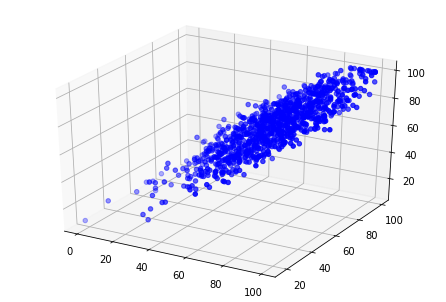

In [19]:
# Ploting the scores as scatter plot
fig = plt.figure()
ax = Axes3D(fig)
ax.scatter(math, read, write, color='blue')
plt.show()



In [20]:

m = len(math)
m # sample size

1000

In [21]:
x0 = np.ones(m)
X = np.array([x0, math, read]).T
print(X)

[[ 1. 72. 72.]
 [ 1. 69. 90.]
 [ 1. 90. 95.]
 ...
 [ 1. 59. 71.]
 [ 1. 68. 78.]
 [ 1. 77. 86.]]


In [22]:
# Başlangıç Katsayıları (Initial Coefficients)
theta = np.array([0, 0, 0])
Y = np.array(write)
alpha = 0.0001

#### Maliyet Fonksiyonunu Hesaplama $J(\Theta) = \frac{1}{2m} \sum_{i=1}^m (h_\Theta(x^{(i)}) - y^{(i)} )^2$

In [23]:
def cost_function(X, Y, theta):
    m = len(Y)
    J = np.sum((X.dot(theta) - Y) ** 2)/(2 * m)  # X(1000,3)  # theta (3,1)
    return J 

inital_cost = cost_function(X, Y, theta)

print("Initial Cost")
print(inital_cost)

Initial Cost
2431.012


## Gradient Descent
Minimize the cost function $J(\Theta)$

By updating Equation and repeat unitil convergence

$\Theta_j := \Theta_j - \alpha \frac{1}{m} \sum_{i=1}^m (h_{\Theta}(x^{(i)}) - y^{(i)})x_j^{(i)}$ (simultaneously update $\Theta_j$ for all $j$)

In [24]:

def gradient_descent(X, Y, theta, alpha, iterations):
    
    cost_history = [0] * iterations  # (1000,1)
    
    m = len(Y)
    
    for iteration in range(iterations):
        
        # Hypothesis Values
        h = X.dot(theta)  # X (1000,3)  #theta(3,1)
        
        # Difference theta/w Hypothesis and Actual Y
        loss = h - Y  #loss(1000,1)
        
        # Gradient Calculation
        gradient = X.T.dot(loss) / m  # gradient(3,1)
        
        # Changing Values of theta using Gradient
        theta = theta - alpha * gradient
        
        # New Cost Value
        cost = cost_function(X, Y, theta)
        cost_history[iteration] = cost
        
    return theta, cost_history



In [25]:
# 1000 Iterations

alpha = 0.0001
newtheta, cost_history = gradient_descent(X, Y, theta, alpha, 1000)

# Yeni teta değerleri
print("New Coefficients")
print(newtheta)

# Yeni Tetanın son Maliyeti
print("Final Cost")
print(cost_history[-1])




New Coefficients
[0.00466862 0.0694196  0.91815749]
Final Cost
10.094308094980901


In [26]:
# Model Evaluation - RMSE
def rmse(Y, Y_pred):
    rmse = np.sqrt(sum((Y - Y_pred) ** 2) / len(Y))
    return rmse

# Model Evaluation - R2 Score
def r2_score(Y, Y_pred):
    mean_y = np.mean(Y)
    ss_tot = sum((Y - mean_y) ** 2)
    ss_res = sum((Y - Y_pred) ** 2)
    r2 = 1 - (ss_res / ss_tot)
    return r2

Y_pred = X.dot(newtheta)


In [27]:
print("RMSE")
print(rmse(Y, Y_pred))
print("R2 Score (Determinasyon Katsayısı)")
print(r2_score(Y, Y_pred))

RMSE
4.493174400127576
R2 Score (Determinasyon Katsayısı)
0.9124810499600305
